# Car vs. Train Travel to Delft: Comparative Study

## 1. Motivation & introduction
Transportation choices significantly impact students’ daily lives, particularly those commuting to Delft without access to free public transportation. This study examines whether owning and using a private car is a worthwhile alternative to traveling by train for such students. By comparing both modes of transport in terms of cost and travel time, during weekday peak hours. The project aims to provide data-driven insights that can help students make informed commuting decisions. Ultimately, this comparative analysis seeks to identify under what conditions car travel becomes more or less advantageous than using the train for regular journeys to Delft.


## 2. Research Questions

**Objectives**

This study aims to evaluate whether students without access to free public transportation would benefit from owning and using a car for commuting to Delft. Specifically, the objectives are to:
- Quantify and compare the costs of commuting to Delft by car and by train. 
- Quantify and compare the travel times of these two modalities, including the influence of peak-hours.
- Identify the commuting threshold at which train travel becomes more cost-effective or time-efficient than car ownership.  
- Provide insights that help students make an informed decision regarding the choice between car and train for commuting to Delft.

To address these objectives, the study focuses on the following research questions:

**Main Research Question**  
How do travel costs and travel times compare between private car use and train travel for commuting from major Dutch cities to Delft during weekday peak hours?  

**Sub-questions**  
1. What are the main cost components of commuting by car and by train, and how do these compare per month?  
2. At what commuting distance or threshold does train travel become more cost-effective than car ownership or vice versa?  
3. **How does travel time differ between car and train, taking into account peak-hour road congestion as well as train schedules, delays, and service disruptions?**     
4. How do variations in fuel price, road tax, or train ticket price affect the comparative outcomes?   

## 3. Possible DataSets and Data gathering process
To begin the research, we first need to identify appropriate data sources that can be used to address the main research questions. The initial step is to collect as many relevant datasets as possible and determine whether they support our objectives. Below is a list of datasets related to the topic.

### 3.1 Useful datasources
- Train disruptions: [Rijden de Treinen Open Data](https://www.rijdendetreinen.nl/en/open-data)  
- Pump price (daily, from 2006): [CBS](https://www.cbs.nl/nl-nl/cijfers/detail/80416ned)  
- NS routes and stations: [NS API Developer Portal](https://apiportal.ns.nl/) 
- Possible typical cars for students: [marktplaats] (https://wwww.marktplaats.nl) 
- Government Road tax: [Motorrijtuigenbelasting | Belastingdienst](https://www.belastingdienst.nl/wps/wcm/connect/bldcontentnl/belastingdienst/prive/auto_en_vervoer/belastingen_op_auto_en_motor/motorrijtuigenbelasting/)
- Insurance costs: [Geld.nl Datamonitor](https://www.geld.nl/autoverzekering/service/datamonitor-autoverzekering)  
- Time and Distance data: [Google Maps](maps.google.com) (https://www.openrouteservice.org)
- Distances between cities: [CBS] (https://www.cbs.nl/nl-nl/maatwerk/2019/27/matrix-afstanden-over-de-weg-woonkernen-2017) (https://www.openrouteservice.org) 
- Train Cost: [NS website](www.ns.nl)
- Distances between train stations: [Rijden de Treinen Tariefafstanden](https://www.rijdendetreinen.nl/open-data/tariefafstanden)

### 3.2 Data collection process
The second step is to assess whether these datasets are useful and if they are able to be extracted for our goals:
- ✅ If so, the data set will be integrated in our data folder to use in our analysis. 
- ❌ If the data is not useful because:
    - The data is not applicable to our problem
    - We are not able to read the data because the data is to difficult to read
    - It requires high-level understanding of out-of-scope coding
    - The data is simply not available in an online data set
    - -> THEN we will manually extract the data into csv files by reading out known websites such as google.maps.com and NS.nl

The data collection has been split up per modality per variable. 

#### 3.3.1 Car information & cost
**General car information**

To represent a typical student car, we surveyed fellow students and found that smaller models are common; two respondents specifically mentioned a Toyota Aygo. Therefore, we selected a 2013 Toyota Aygo as the representative vehicle and collected data from a Marktplaats advert. The advert provided the following details:

- Maintenance cost per month: €59.44
- Average fuel efficiency: 23.3 km/l
- The car datasheet has been added to the data list and anonymized.

**Fuel prices**

Because the car uses fossil fuel, we obtained fuel (pump) prices and calculated the monthly average fuel price to estimate monthly fuel expenses. For this the datasheet from the CBS website for the month september was used:
https://www.cbs.nl/nl-nl/cijfers/detail/80416ned)  

**Insurance**

An important cost factor that varies between cities is **car insurance**. The premium depends on both the driver and the type of vehicle. Unfortunately, there are too many insurance providers to make a consistent comparison, and no unified dataset exists since rates fluctuate daily. Therefore, the insurance cost for a **2013 Toyota Aygo**, driven by a **student with 0 damage-free years**, was obtained from [www.independer.nl](https://www.independer.nl/autoverzekering/intro.aspx). Based on this source, a list of estimated insurance costs per city has been compiled.

**Taxes**

The main tax that applies is the **motorrijtuigenbelasting** (vehicle tax), which differs per province and is based on the car’s weight. There is no central government dataset for this, so values were calculated using the official tax calculator provided by the Dutch Tax Authority:  
[https://www.belastingdienst.nl/wps/wcm/connect/nl/auto-en-vervoer/content/hulpmiddel-motorrijtuigenbelasting-berekenen](https://www.belastingdienst.nl/wps/wcm/connect/nl/auto-en-vervoer/content/hulpmiddel-motorrijtuigenbelasting-berekenen)


**Parking permit**

At **TU Delft**, parking is free, but in most city centers where students live, it is not. Parking rules and permit fees vary by municipality, and there is no centralized dataset for this information. Data for parking permits were collected from the **12 respective municipal websites** that publish local parking policies.


#### 3.3.2 Car Time & Distance

To represent the wide geographical spread of starting locations, major Dutch railway stations were selected as reference points. Travel distance and duration data were obtained using the **OpenRouteService (ORS) API**, an open-source routing tool based on **OpenStreetMap (OSM)** data. The input data came from a CSV file (`Dutch_Central_Stations_Coordinates.csv`) containing the names and geographical coordinates (latitude and longitude) of central stations in major Dutch cities.

The coordinates from this file were read into Python using the `pandas` library and processed through the ORS **distance matrix** service. This service automatically computes travel distances and times between all pairs of locations in the dataset, based on real road network data. An ORS API client was initialized using a personal API key obtained from [OpenRouteService](https://www.openrouteservice.org). Using the `distance_matrix()` function with the *driving-car* profile, both **travel distances** (in kilometers) and **travel times** (in seconds, later converted to minutes) were calculated for every station pair.

The resulting matrices were stored in `pandas` DataFrames and exported to an Excel file (`Matrices_Stations.xlsx`), which contains two separate sheets — one for distances and one for travel times. This method produced a complete pairwise matrix of realistic driving distances and durations between all major Dutch railway stations, derived from the OpenStreetMap road network.


#### 3.4.3 Train time & costs
'Tariefeenheden' are distance units used in Dutch public transport to calculate travel fares and the travel time. They roughly correspond to kilometers but are based on fixed routes between stations. The total number of tariefeenheden between the departure and arrival stations determines the ticket price, which is calculated using a base fare plus a rate per tariefeenheid. The data sheet is available, but because the exact calculation method is not, we used the NS website to determine the train costs and travel times.

In addition, we added 10 minutes to the travel time to account for the journey from Delft station to the campus.


### 3.5 Final gathered Datasheets
1. Car_information.csv
2. RoadTaxes_InsuranceCity_ParkingPermitCity.csv
3. Distances between cities gathered from API: CarDistance_matrix.csv
4. Traveltime between cities gatherd from API: CarTime_matrix.csv
5. Pompprijzen_motorbrandstoffen__brandstofsoort__per_dag_06102025_122232.csv
6. Train distances, prices and travel time to Delft: TrainDistancesDelft_NSPrices_NSTravelTime.csv
7. Dutch_Central_Stations_Coordinates
8. Matrices_Stations.xlsx


## 4. Basic pre-conditions
### 4.1 General pre-conditions
- 21 year old student
- Goes 4 days a week to the TU Delft. Average of 4,5 weeks in a month, thus the students travels 18 times a month back-and-forth to the TU Delft.
- The starting point of every travel is the central train station in every city. This goes for train travel aswell as for car travel. It is assumed that the student lives within close range of the trainstation in every city and thus starts it travel from there. First mile difference is thus not accounted for between car and trian. Assumption is that  has a parking permit close to the station.
- The end point is the TU Delft campus.


### 4.2 Car Travel
**Cost factors**
- The student posesses a 2013 Toyota Aygo, a datasheet has been created from an open advert on "Marktplaats.nl"    
- Average car insurance costs for a 21-year-old driver with 0 damage free years, differentiated per city per month.
- Average car maintenance costs for a 2013 Toyota Aygo per month taken from the advert.  
- Average national fuel expenses based on current pump prices in the month of september.
- Average parking cost per city centre per month taken from municipality sites.
- Car parking is free at the TU Delft.  
- Government road tax applicable to each city (regulated per province).

**Time & distance factors**  
- Travel times were obtained using the OpenRouteService (ORS) Python API, which estimates average driving times based on the OpenStreetMap (OSM) road network.
- Distances were derived from the same API and represent network-based driving distances, not straight-line distances.
- The average distance is taken from the extracted data TO and FROM Delft.
- According to the TomTom Traffic Index (2024), Groningen experiences the highest congestion level, with an average of 32%, corresponding to approximately 44 hours lost annually in rush-hour traffic. Based on these national congestion figures, a delay factor of 35% was adopted in this report to represent the typical additional travel time experienced when commuting by car under non-optimal traffic conditions. https://www.iamexpat.nl/expat-info/dutch-news/which-cities-netherlands-have-worst-car-traffic  

### 4.3 Train Travel
**Cost factors**  
- The student does not posses the general Dutch free-public-transport subscription for students. 
- Standard second-class ticket prices, without any discount subscriptions. The discount subscription can be added as a factor later.
- Assumption that all travelers reach the departure station by bicycle, as an additional cost factor a bike subscription can be taken. SwapFiets can be taken as an example, which is 17,90 euro per month.

**Time factors**  
- 10 minutes are added to the travel time by train to simulate the bike travel from Delft station to the TU Delft.
- Travel times based on NS schedules during peak hours.  
- **Additional delays due to potential disruptions or train service irregularities are considered as a added percentage to the travel time (10% to start).**  
- Measured travel times are taken between central stations of the selected cities and Delft. 

  

## 5. Data Analysis Pipeline
### 5.1 Cars
1. Read travel time data from sheet to Delft per city (collected from Google Maps).  
2. Compute adjusted travel time including delays to Delft per city.  
3. Read travel cost data from sheet (4 constant sheets + 1 variable sheet for gasoline prices).  
4. Combine travel time and cost for each city.  
5. Plot graphs per city: Car travel (cost vs time).  

### 5.2 Trains
1. Read travel time data per train station to Delft from sheet.  
2. Compute adjusted travel time including delays to Delft per city.  
3. Read travel cost data per train station to Delft.  
4. Combine travel time and cost for each city.  
5. Plot graphs per city: Train travel (cost vs time).  

### 5.3 Comparison
1. Create a general datasheet from all the different data sheets.  
2. Compare datasets: Which option is faster and/or cheaper per city?  
3. Analyze trade-offs Express one variable in terms of another (e.g., how does time translate into money and would that impact your choice?).  


## 6. Modelling & research

### 6.1 Getting the correct car distances times


The table below provides the estimated highway mean driving distances (in kilometers) and the typical motorway routes, as derived from Google Maps. These distances serve as the basis for comparing travel costs and times between car and train. The numbers represent

| City        | Mean Distance(km)| Typical Highway Route                        
|-------------|------------------|----------------------------------------------|
| Amsterdam   | 70.48            | A10 → A4 → A13                               |
| Rotterdam   | 12.54            | A13                                          |
| The Hague   | 13.74            | A4 → A13                                     |
| Utrecht     | 65.67            | A12 → A4 → A13                               |
| Eindhoven   | 127.36           | A2 → A58 → A16 → A20 → A13                   |
| Tilburg     | 95.34            | A58 → A16 → A20 → A13                        |
| Almere      | 92.08            | A6 → A1 → A9 → A2 → A10 → A4 → A13           |
| Groningen   | 239.56           | A7 → A6 → A1 → A9 → A2 → A10 → A4 → A13      |
| Breda       | 64.39            | A16 → A20 → A13                              |
| Nijmegen    | 131.55           | N325 → A15 → A16 → A20 → A13                 |
| Leeuwarden  | 195.82           | A31 → N31 → A7 → A8 → A10 → A5 → A4 → A13    |
| Maastricht  | 233.28           | A2 → A58 → A16 → A20 → A13                   |


Calculating cost and time for trains and cars

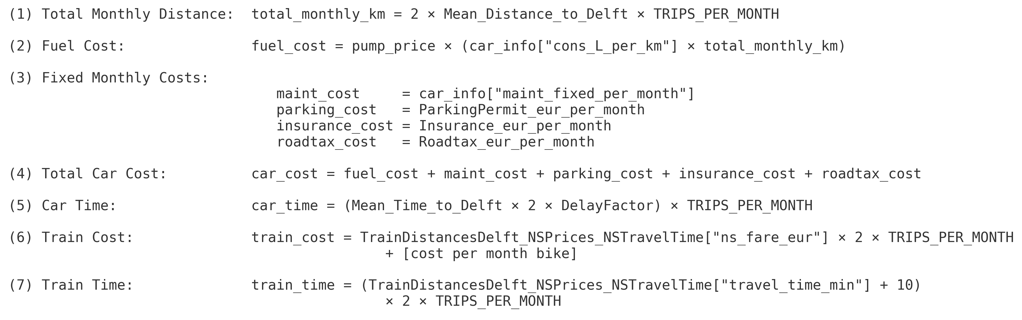








## 7. Results

## 7.1 Train results
The three figures presented below collectively illustrate the spatial and quantitative patterns of train commuting to and from Delft. The first figure shows that commuters from nearby cities such as The Hague and Rotterdam incur relatively low expenses (below €200 per month), those traveling from distant regions, particularly in the north and south of the Netherlands, face costs exceeding €1,100 per month.
![Train Cost](figures\Train\cost_bars_month_peak.png)

The second figure shows the monthly travel time by city. Similarly, the results presented show a clear relationship between distance and total travel time. Commuters from nearby cities such as Rotterdam and The Hague spend less than 1,000 minutes per month traveling, whereas those from Groningen, Leeuwarden, and Maastricht exceed 5,700 minutes. Mid-distance cities, including Utrecht and Eindhoven, fall within an intermediate range of 2,000 to 3,000 minutes.
![Train Traveltime](figures\Train\time_bars_month_peak.png)

The third figure brings these observations together by jointly illustrating monthly train cost and travel time. A clear positive relationship emerges: cities with longer travel times also exhibit higher commuting costs. This correlation suggests that both cost and time increase proportionally with distance.
![Train Cost and Traveltime comparison](figures\Train\cost_month_vs_time_month_peak.png)

### 7.2 Car results
The three figures presented below collectively illustrate the spatial and quantitative patterns of car commuting to and from Delft. The first figure presents the estimated monthly car commuting costs per city for travel to and from Delft. Similar to the pattern observed for train travel, car costs increase substantially with distance. The lowest monthly expenses occur for nearby cities such as The Hague (€207) and Rotterdam (€222), while the highest costs are recorded for Maastricht (€844) and Groningen (€831). Mid-distance cities such as Eindhoven, Nijmegen, and Tilburg fall within a moderate cost range of approximately €500 to €700 per month.
![Car Cost](figures\Car\Monthly_car_cost_per_city.png)

The second figure presents the estimated total monthly car travel time per city for commuting to and from Delft. As expected, a strong relationship is observed between travel distance and total travel time, with commuters from nearby cities such as The Hague and Rotterdam spending less than 1,000 minutes per month on average, while those from Groningen, Leeuwarden, and Maastricht exceed 7,000 minutes.

These results indicate that car travel time increases sharply with distance, consistent with the expected effects of longer routes and urban congestion. The pattern also aligns closely with the previously observed trend for train travel times, although the relative differences between nearby and distant cities appear more pronounced in the case of car travel.

The distribution of travel time therefore highlights the growing inefficiency of long-distance car commuting, particularly for cities located in the northern and southern regions. This provides an important empirical basis for the subsequent comparison of travel efficiency between car and train modes.
![Car Traveltime](figures\Car\Monthly_traveltime_per_city.png)

The third figure combines the findings from the previous two charts by illustrating the relationship between monthly car travel time and associated commuting costs per city. The results reveal a clear positive correlation: cities with longer travel times also incur higher monthly costs. This pattern indicates that both cost and time increase proportionally with distance, reflecting the combined influence of fuel consumption, maintenance, and travel duration.

Nearby cities such as The Hague and Rotterdam exhibit both low travel times (below 1,000 minutes per month) and low costs (around €200 per month), highlighting the efficiency of short-distance car commuting. In contrast, long-distance cities such as Groningen, Leeuwarden, and Maastricht exceed 7,000 minutes of travel time and €800 in monthly expenses, illustrating the escalating burden of extended car travel. Mid-distance cities such as Utrecht, Tilburg, and Eindhoven occupy an intermediate position, consistent with their geographic proximity to Delft.

The observed relationship thus confirms that, for car travel, total commuting cost and travel time are strongly interdependent and primarily determined by distance. These results serve as a direct counterpart to the train analysis, enabling a subsequent comparison of cost and time efficiency between both modes.
![Car Cost and Traveltime comparison](figures\Car\Carcost_vs_cartime.png)

### 7.3 Comparison Train and Car
Having examined the travel cost and time characteristics of both transport modes separately, the following figures compare the car and train results to assess their relative efficiency for commuting to and from Delft. This comparison focuses on two key dimensions: financial cost and travel time, which together determine the economic and practical feasibility of each commuting option. By analysing differences in monthly cost and total travel duration per city, this section aims to identify under which conditions car travel or train travel provides a more advantageous alternative. The comparison thus forms the basis for evaluating whether commuting to Delft is generally cheaper or more comfortable by train or by private car.

The first figure directly compares the estimated monthly commuting costs of car and train travel for each city. Overall, a clear spatial pattern emerges in which train travel is more expensive than car travel for nearly all cities, particularly for long-distance connections such as Groningen, Leeuwarden, and Maastricht, where train costs exceed €1,000 per month compared to car costs of approximately €800. This indicates that the financial burden of train commuting increases more steeply with distance than that of car travel.

In contrast, for short-distance cities such as The Hague and Rotterdam, both modes exhibit relatively low monthly costs, though the car remains slightly more expensive when parking and fuel are considered. Mid-distance cities such as Utrecht, Tilburg, and Eindhoven fall within an intermediate range, where the cost difference between car and train narrows but still favours car travel.

These findings suggest that while both modes become costlier with increasing distance, the train imposes a higher monthly financial cost for most commuters. This provides an important economic perspective for evaluating the overall efficiency of car versus train travel to Delft.
![Cost comparison](figures\Comparison\cost_comparison.png)

The second figure compares the total monthly travel time by car and by train for commuters to and from Delft. Overall, the results indicate that train travel generally requires less time than car travel, particularly for long-distance commutes. For instance, commuters from Groningen, Leeuwarden, and Maastricht spend approximately 6,000–7,000 minutes per month by train compared with 7,000–8,000 minutes by car, highlighting the impact of congestion and reduced driving efficiency over longer routes.

In contrast, for short-distance cities such as The Hague and Rotterdam, both travel modes show similar total travel times of around 800–900 minutes per month, suggesting that car travel remains competitive for nearby connections. For mid-distance cities, including Utrecht, Tilburg, and Eindhoven, train travel offers a moderate time advantage, with car journeys generally taking several hundred minutes longer per month.

These results show that travel time increases with distance for both modes, but the rate of increase is steeper for car travel, reflecting the cumulative effect of congestion and route inefficiency. The comparison therefore suggests that, in terms of travel time, the train provides a more efficient mode of transport for medium- and long-distance commuters, while the car remains comparable for short-distance routes.
![Traveltime comparison](figures\Comparison\traveltime_comparison.png)

The third figure integrates the cost and time analyses for both transport modes, providing a comprehensive comparison of commuting efficiency to and from Delft. The plotted data show distinct yet related trends for car and train travel: both exhibit a positive correlation between monthly cost and total travel time, but with differing slopes. The train trend line rises more steeply, indicating that train costs increase disproportionately with distance, whereas the car trend line displays a more gradual incline.

The intersection point between both curves, located at approximately 930 minutes of monthly travel time and €220, represents the threshold at which car and train commuting become equally costly. Below this threshold—corresponding to nearby cities such as The Hague and Rotterdam—car travel remains the cheaper option. Beyond this point, train travel becomes increasingly expensive, though it generally offers shorter total travel times.

The inclusion of the “Altijd Vrij + Swapfiets” reference line at approximately €393.60 further contextualizes the results. Under the assumptions of this study, it was specified that students do not benefit from any discount subscriptions and therefore pay full-price fares for their monthly train travel. The reference line thus represents the combined cost of the most comprehensive NS travel pass (“Altijd Vrij”) and a Swapfiets bicycle subscription, serving as a benchmark for the highest feasible fixed commuting cost. The fact that most medium- and long-distance cities fall above this threshold suggests that, in such cases, it would actually be more economical to purchase the most expensive NS subscription in combination with a bike than to rely on standard full-fare tickets. 
![Cost and Time comparison](figures\Comparison\cost_traveltime_comparison.png)
- table of car vs train time + column which is better
- table of car vs train cost + column which is better
- Table showing 

then:
- Looking at different discounts WE SHOULD ACTUALLY JUST DO THIS AND ADD IT TO OUR REPORT!!!!!!!
--- 40% discount for train (5,90 per month) if we chance the student to travel outside of peakhours with the train
--- 20% discount rush-hour (x euro's per month)
--- Unlimited travel subscription (375,50 euro's per month or something)

 
 discussing these results


## 8. Conclusion
Based on the comparison of monthly travel cost and time for both car and train commuting to and from Delft, the results reveal a distinct trade-off between financial and temporal efficiency. For short-distance cities such as The Hague and Rotterdam, car travel proves to be the more cost-effective option, offering comparable travel times at substantially lower monthly expenses. However, as distance increases, the travel time for car users grows disproportionately, largely due to congestion and route inefficiency, while train travel remains relatively stable in duration.

When considering costs, train commuting without a discount subscription is generally more expensive than traveling by car, especially for medium- and long-distance routes where monthly train costs can exceed €1,000. Nevertheless, when incorporating the Altijd Vrij + Swapfiets subscription as a fixed-cost alternative (approximately €393.60 per month), train travel becomes economically competitive beyond a certain distance. For frequent commuters, purchasing such a subscription would therefore offer a more predictable and often cheaper long-term option than paying full fares or driving over extended distances.

In summary, car travel is financially advantageous for short distances, while train travel—particularly with a subscription—becomes more time-efficient and potentially cost-effective for longer commutes. The optimal choice thus depends on travel distance and frequency, with the subscription-based train option offering a practical balance between cost stability and travel comfort for regular long-distance commuters to Delft.

## 9. Recommendations and discussion
- congestion factors for train and car needs to be included, how to do?
- first and last mile needs to be defined more precise (last mile is closeby to highway and 10 minute bike assumption works)
- First mile depends on neighbourhood in city of origin.
- look at monthly budget
- look at monthly maximum travel time
- some cites are not desirble because of these values




## 10. Contribution statement